### Exploratory Data Analysis Part 1

#### Set up imports for Pandas, Matplotlib, MySQL Connector


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

#### Connecting to MySQL Database

In [2]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", password="D3v$tudent", use_pure=True)
select_query = "SELECT * FROM city_saledbcity_saledb"

df = pd.read_sql_query(select_query, mydb)

df.head()

C:\Users\Godov\AppData\Local\Temp\ipykernel_13000\3993325904.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(select_query, mydb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,Seattle


#### Starting Cleaning Data Process

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_Price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Date           1000 non-null   object 
 8   Time           1000 non-null   object 
 9   Payment        1000 non-null   object 
 10  COGS           1000 non-null   float64
 11  Gross_Income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  City_ID        1000 non-null   int64  
 14  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 117.3+ KB


#### Renaming Columns

In [4]:
renamed_df = df.rename(columns={"Gross_Income": "Sales Tax","COGS": "Cost Before Taxes"})

renamed_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,Cost Before Taxes,Sales Tax,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,Seattle


#### Checking and Removing duplicates

In [5]:
renamed_df.duplicated().sort_values()


0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

#### Changing DateTime Format

In [6]:
renamed_df["Date"] = pd.to_datetime(renamed_df["Date"])

renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Invoice_ID         1000 non-null   object        
 1   Customer_Type      1000 non-null   object        
 2   Gender             1000 non-null   object        
 3   Product_Line       1000 non-null   object        
 4   Unit_Price         1000 non-null   float64       
 5   Quantity           1000 non-null   int64         
 6   Total              1000 non-null   float64       
 7   Date               1000 non-null   datetime64[ns]
 8   Time               1000 non-null   object        
 9   Payment            1000 non-null   object        
 10  Cost Before Taxes  1000 non-null   float64       
 11  Sales Tax          1000 non-null   float64       
 12  Rating             1000 non-null   float64       
 13  City_ID            1000 non-null   int64         
 14  City     

#### Questionaire
- How many sales were made for members vs normal customers? 

The members purchase 501 and the normal customers only purchase 499. Meaning the members brought two more then normal customers.

In [7]:
renamed_df.value_counts("Customer_Type")

Customer_Type
Member    501
Normal    499
dtype: int64

- How many sales were made at each store location? 

Seattle has the most sales with 340 sold, then New York City with 332 sold, and last but not least Milwaukee with 328 sold.


In [8]:
renamed_df.value_counts("City")

City
Seattle          340
New York City    332
Milwaukee        328
dtype: int64

- How many sales were made for each product line?



In [9]:
renamed_df.value_counts("Product_Line")

Product_Line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
dtype: int64

- What is the overall average rating, based on all sales records?

In [10]:
sum_df = sum(renamed_df["Rating"])

avg_df = sum_df/len(renamed_df["Rating"])

print(round(avg_df, 2))


6.97


#### Creating a Bar Plot

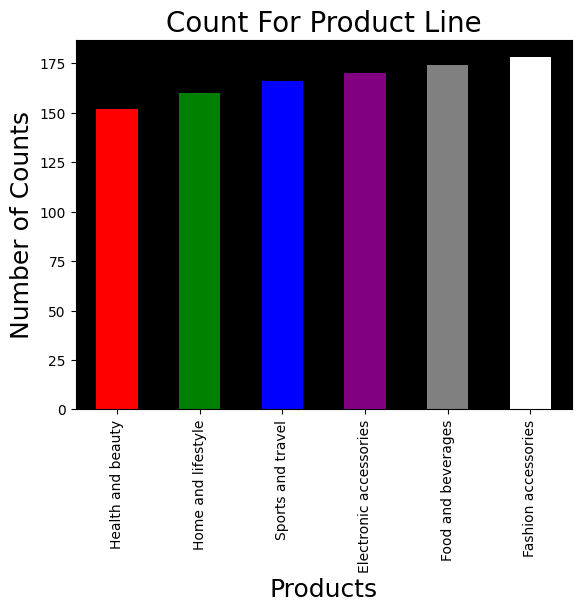

In [11]:
count_product = renamed_df["Product_Line"].value_counts().sort_values()

my_bar = count_product.plot.bar(color=["red", "green", "blue", "purple", "grey", "white"])

plt.title("Count For Product Line", fontsize= 20)

plt.xlabel("Products", fontsize=18)
plt.ylabel("Number of Counts", fontsize=18);

my_bar.set_facecolor("black")



#### Creating Pie Plot

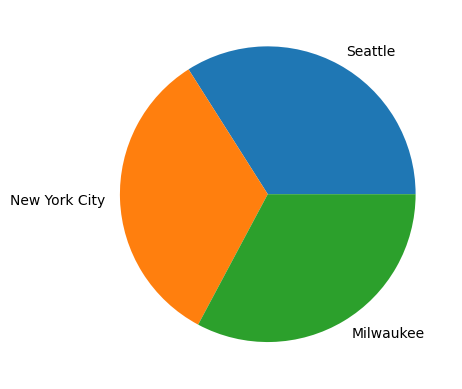

In [12]:

city_counts = renamed_df["City"].value_counts()

city_counts.plot.pie();

plt.ylabel("");


#### Creating Line Plot

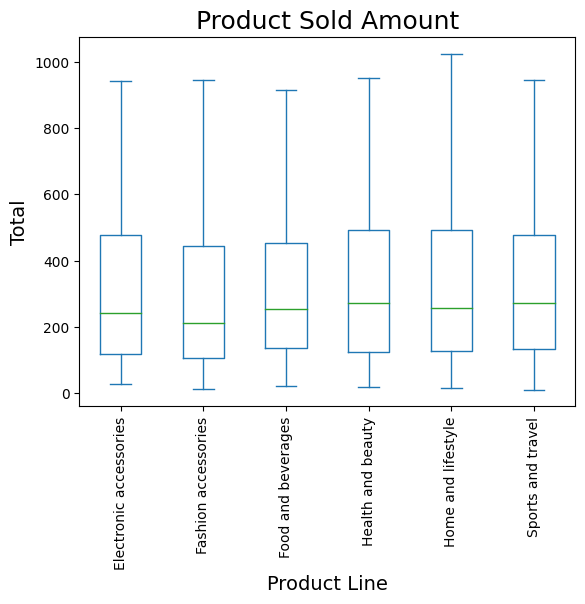

In [13]:
renamed_df.plot.box(column="Total", by="Product_Line", showfliers=False)

plt.title("Product Sold Amount", fontsize=18)
plt.xticks(rotation="vertical");

plt.ylabel("Total", fontsize=14)
plt.xlabel("Product Line", fontsize=14);


#### Summary of DataFrame

In [14]:
renamed_df.describe()

,Unit_Price,Quantity,Total,Cost Before Taxes,Sales Tax,Rating,City_ID
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270,1.988000
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858,0.817633
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000,1.000000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000,1.000000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000,2.000000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000,3.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,3.000000


#### Summary of Correlation

In [18]:
renamed_df.corr()

C:\Users\Godov\AppData\Local\Temp\ipykernel_13000\2841605703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renamed_df.corr()


,Unit_Price,Quantity,Total,Cost Before Taxes,Sales Tax,Rating,City_ID
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778,0.028202
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815,0.015964
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Cost Before Taxes,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Sales Tax,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000,0.010238
City_ID,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238,1.000000


#### Reshaping Process

In [19]:
reshaped_x = renamed_df[["Quantity"]]
reshaped_y = renamed_df["Total"]

#### Preparing Linear Regression Model

In [20]:
model = LinearRegression()

model.fit(reshaped_x, reshaped_y)

y_prediction = model.predict(reshaped_x)

#### Matplotlib Scatter Plot 

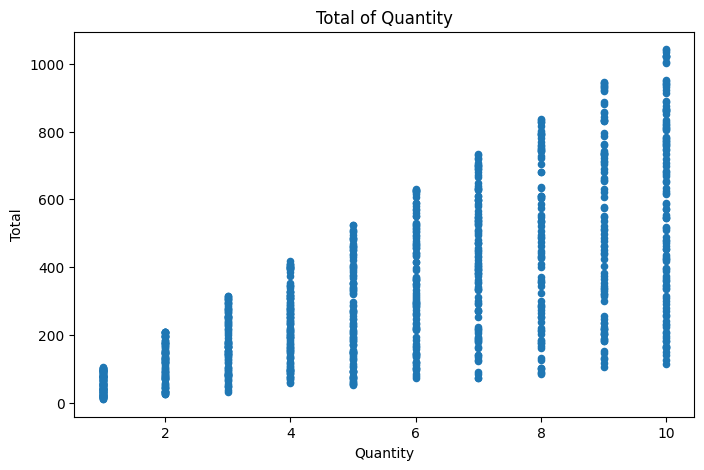

In [22]:
renamed_df.plot.scatter(x="Quantity", y="Total", figsize=(8,5))

plt.title("Total of Quantity");

#### Visualizing Predictive Model

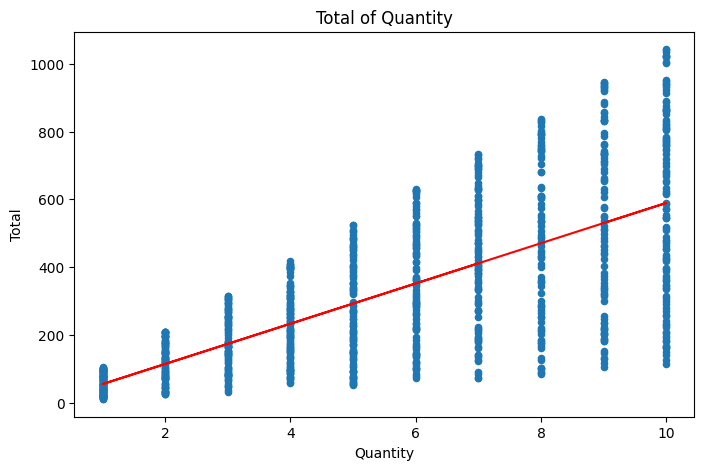

In [23]:
renamed_df.plot.scatter(x="Quantity", y="Total", figsize=(8,5))

plt.plot(reshaped_x, y_prediction, color="red")

plt.title("Total of Quantity");